https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#more-advanced-over-sampling-using-adasyn-and-smote

In [1]:
import os
import numpy as np
import scipy
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.__version__

'1.20.3'

In [3]:
scipy.__version__

'1.7.1'

In [4]:
sklearn.__version__

'1.0.1'

In [5]:
keras.__version__

'2.5.0'

In [6]:
os.getcwd()

'C:\\Users\\KonuTech'

In [7]:
# pip install -U imbalanced-learn

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [70]:
def create_dataset(
    n_samples=25000,
    weights=(1, 1),
#     n_classes=1,
    class_sep=1,
#     n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_repeated=0,
        n_redundant=0,
        n_classes=2,
        n_clusters_per_class=1,
        weights=weights,
        class_sep=0.8,
#         random_state=0
    )

In [10]:
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

In [11]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

# OVERSAMPLING

In [16]:
clf = LogisticRegression()

(array([0, 1]), array([  988, 24012], dtype=int64))
(array([0, 1]), array([12492, 12508], dtype=int64))


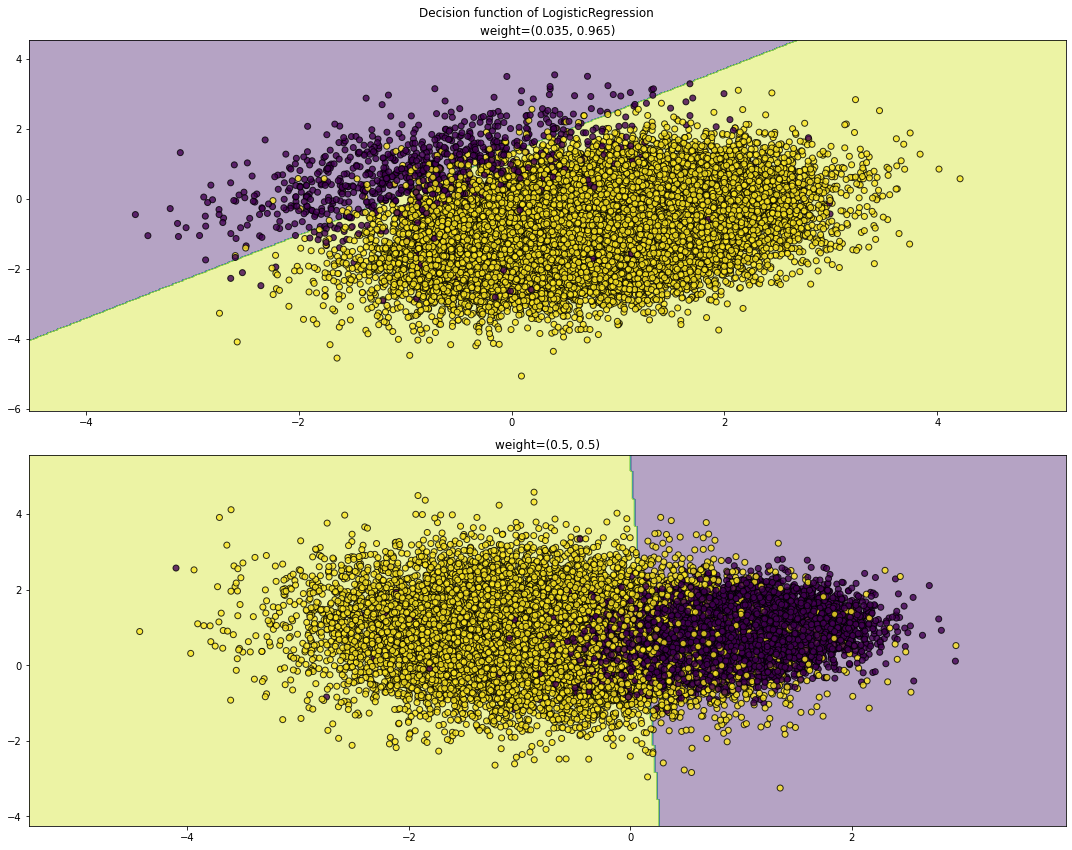

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(15, 12))

weights_arr = [
    (0.035, 0.965),
     (0.5, 0.5)
    ]

for ax, w in zip(axs.ravel(), weights_arr):
    X, y = create_dataset(weights=w)
    print(np.unique(y, return_counts=True))
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax, title=f"weight={w}")
    fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

In [38]:
n_samples=25000
weights=(0.035, 0.965)

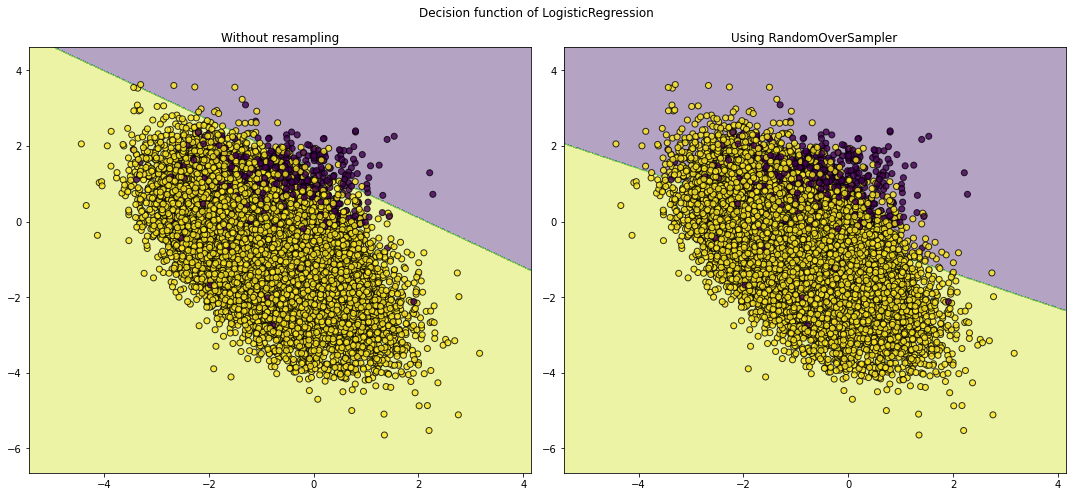

In [39]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

X, y = create_dataset(n_samples=n_samples, weights=weights)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

clf.fit(X, y)
plot_decision_function(X, y, clf, axs[0], title="Without resampling")

sampler = RandomOverSampler(random_state=0)
model = make_pipeline(sampler, clf).fit(X, y)
plot_decision_function(X, y, model, axs[1], f"Using {model[0].__class__.__name__}")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

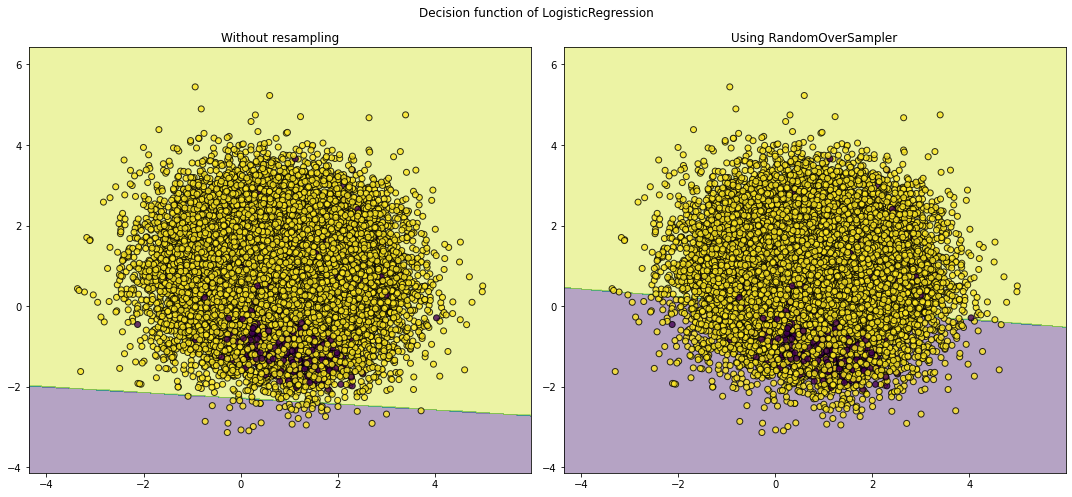

In [84]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

X, y = create_dataset(n_samples=n_samples, weights=weights)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

clf.fit(X, y)
plot_decision_function(X, y, clf, axs[0], title="Without resampling")

sampler = RandomOverSampler(shrinkage=0.6, random_state=0)
model = make_pipeline(sampler, clf).fit(X, y)
plot_decision_function(X, y, model, axs[1], f"Using {model[0].__class__.__name__}")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

In [40]:
X.shape

(25000, 2)

In [41]:
#np.unique(X, return_counts=True)

In [42]:
y.shape

(25000,)

In [43]:
np.unique(y, return_counts=True)

(array([0, 1]), array([  983, 24017], dtype=int64))

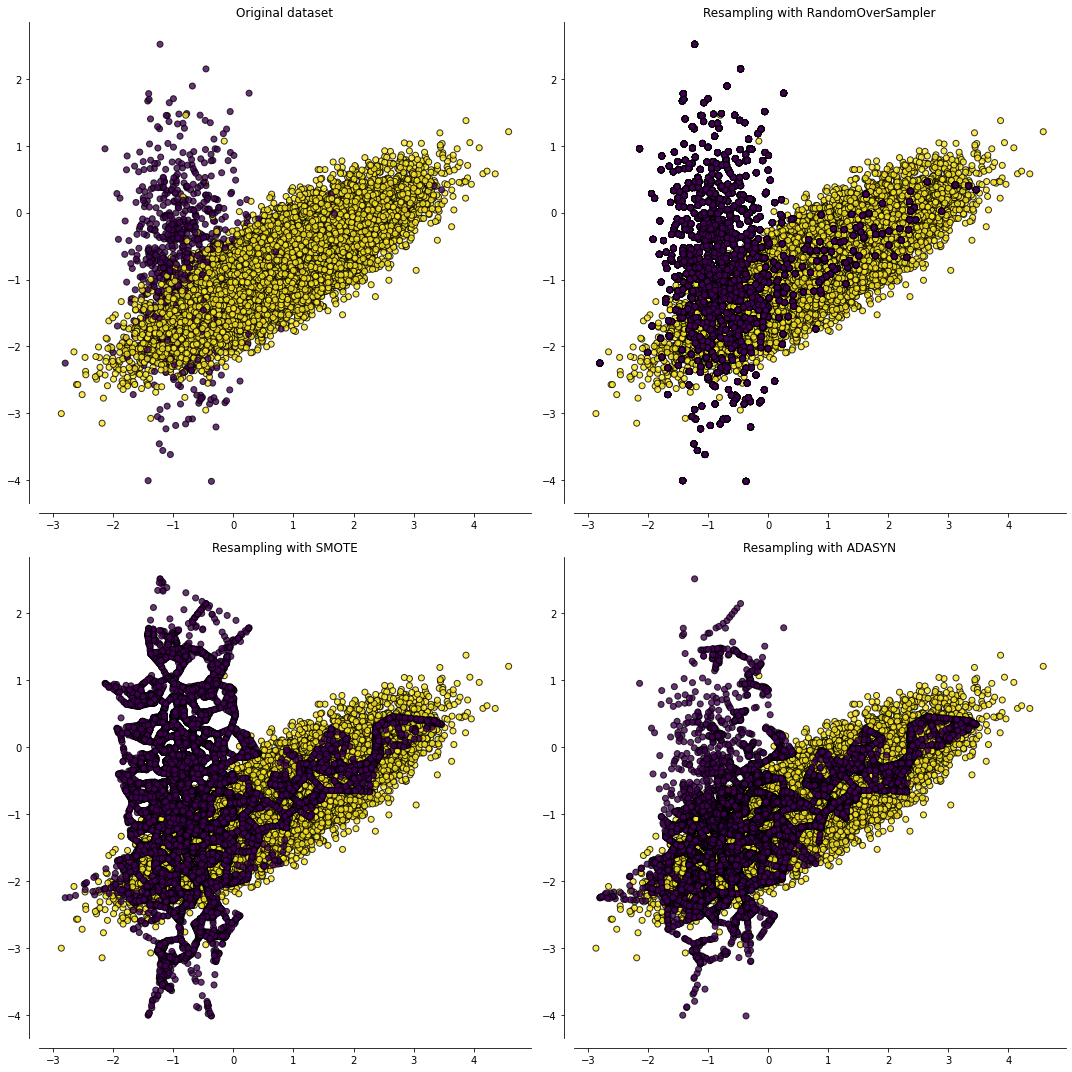

In [50]:
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.over_sampling import SMOTE, ADASYN

X, y = create_dataset(n_samples=n_samples, weights=weights)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

for ax, sampler in zip(axs.ravel(), samplers):
    title = "Original dataset" if isinstance(sampler, FunctionSampler) else None
    plot_resampling(X, y, sampler, ax, title=title)
fig.tight_layout()

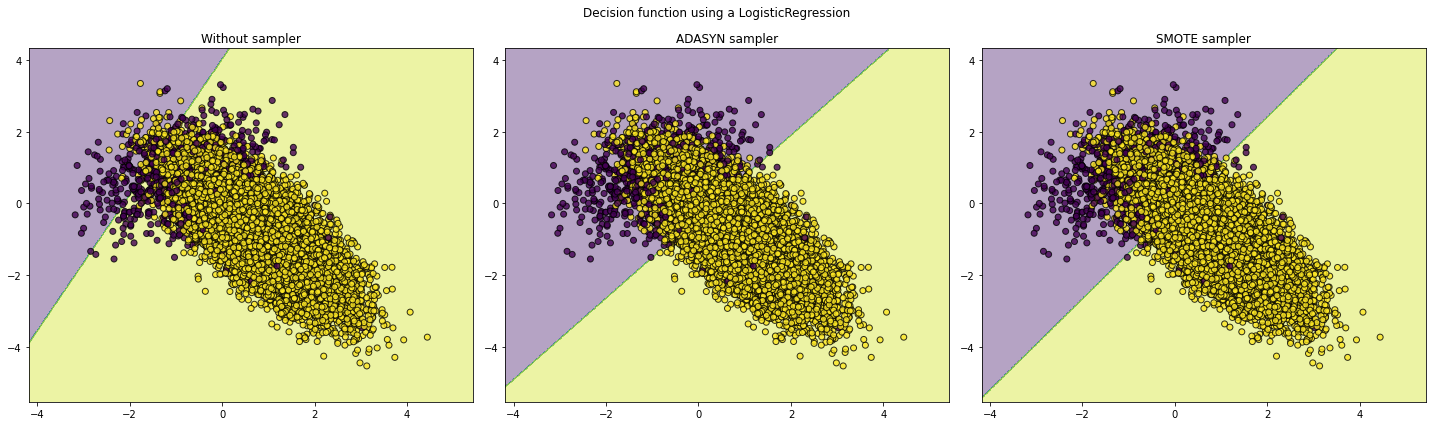

In [77]:
X, y = create_dataset(n_samples=n_samples, weights=weights)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

models = {
    "Without sampler": clf,
    "ADASYN sampler": make_pipeline(ADASYN(random_state=0), clf),
    "SMOTE sampler": make_pipeline(SMOTE(random_state=0), clf),
}

for ax, (title, model) in zip(axs, models.items()):
    model.fit(X, y)
    plot_decision_function(X, y, model, ax=ax, title=title)

fig.suptitle(f"Decision function using a {clf.__class__.__name__}")
fig.tight_layout()

(array([0, 1]), array([  973, 24027], dtype=int64))


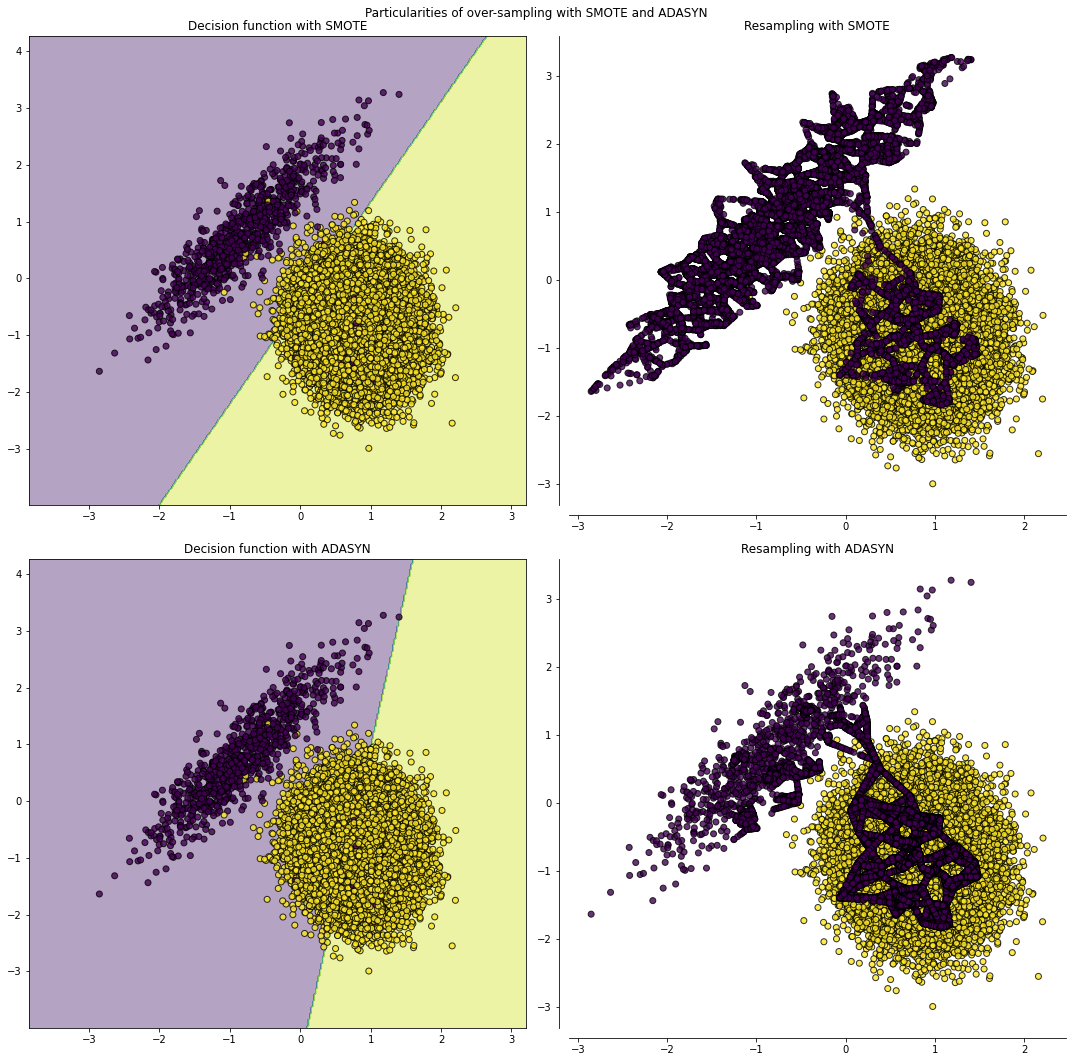

In [80]:
X, y = create_dataset(n_samples=n_samples, weights=weights, class_sep=0.8)
print(np.unique(y, return_counts=True))
samplers = [SMOTE(random_state=0), ADASYN(random_state=0)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, clf, ax[0], title=f"Decision function with {sampler.__class__.__name__}"
    )
    plot_resampling(X, y, sampler, ax[1])

fig.suptitle("Particularities of over-sampling with SMOTE and ADASYN")
fig.tight_layout()

(array([0, 1]), array([  996, 24004], dtype=int64))


C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


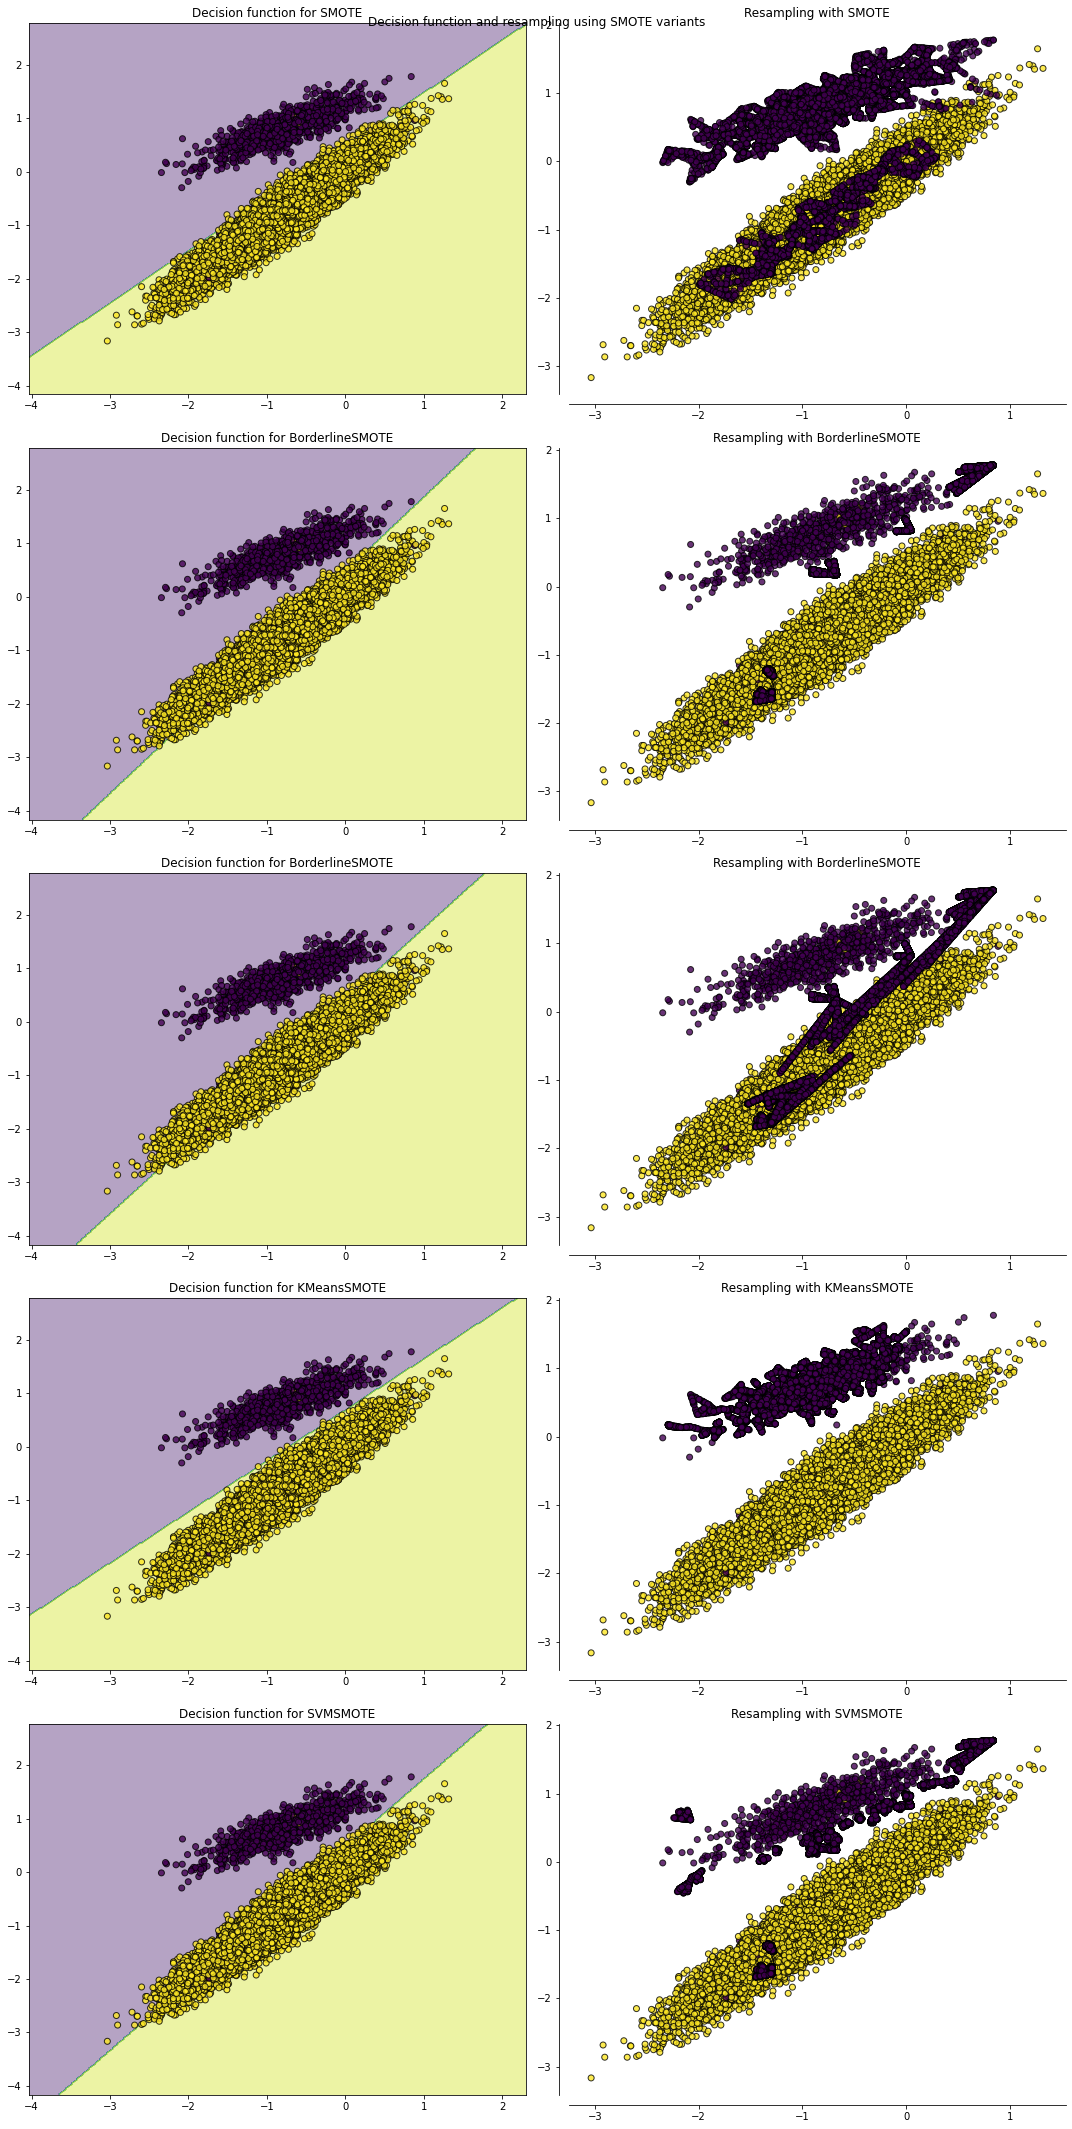

In [83]:
from imblearn.over_sampling import BorderlineSMOTE, KMeansSMOTE, SVMSMOTE

X, y = create_dataset(n_samples=n_samples, weights=weights, class_sep=0.8)
print(np.unique(y, return_counts=True))
fig, axs = plt.subplots(5, 2, figsize=(15, 30))

samplers = [
    SMOTE(random_state=0),
    BorderlineSMOTE(random_state=0, kind="borderline-1"),
    BorderlineSMOTE(random_state=0, kind="borderline-2"),
    KMeansSMOTE(random_state=0),
    SVMSMOTE(random_state=0),
]

for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X, y)
    plot_decision_function(
        X, y, clf, ax[0], title=f"Decision function for {sampler.__class__.__name__}"
    )
    plot_resampling(X, y, sampler, ax[1])

fig.suptitle("Decision function and resampling using SMOTE variants")
fig.tight_layout()

# UNDERSAMPLING

## COMBINATION OF UNDERSAMLING AND OVERSAMPLING

# MODIFIED ENSAMBLE CLASSIFIERS FOR SAMPLING